In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [16]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")


Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10


In [17]:
# Create URL to collect links from paginated data
url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
response = requests.get(url)

    # Parse content
content = response.content
parsed_content = BeautifulSoup(content, 'html.parser')
for para in parsed_content.find_all("div", {"class": "text_content"}):
     reviews.append(para.get_text())

print(f"   ---> {len(reviews)} total reviews")

   ---> 100 total reviews


In [18]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | A very good service on board...
1,✅ Trip Verified | This was the worst experienc...
2,✅ Trip Verified | London to Larnaca. New A321...
3,Not Verified | Gatwick to Orlando. Excellent ...
4,✅ Trip Verified | London to Munich. The plane...


In [19]:
df.to_csv("data/BA_reviews.csv")

In [20]:
!ls data

BA_reviews.csv


In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [22]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
df = pd.read_csv("data/BA_reviews.csv")
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | A very good service on board...
1,1,✅ Trip Verified | This was the worst experienc...
2,2,✅ Trip Verified | London to Larnaca. New A321...
3,3,Not Verified | Gatwick to Orlando. Excellent ...
4,4,✅ Trip Verified | London to Munich. The plane...


In [27]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text) #Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text) #remove punctuation
    text = text.lower() #convert to lowerrcase
    tokens = word_tokenize(text) #tokenize the text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply the cleaning function to the reviews
df['Cleaned_Review'] = df['reviews'].apply(clean_text)

# Save the cleaned data
df.to_csv('data/cleaned_ba_reviews.csv', index=False)
df.head()

,Unnamed: 0,reviews,Cleaned_Review,Sentiment
0,0,✅ Trip Verified | A very good service on board...,trip verified good service board flight britis...,0.056002
1,1,✅ Trip Verified | This was the worst experienc...,trip verified worst experience ever flying suf...,-0.254167
2,2,✅ Trip Verified | London to Larnaca. New A321...,trip verified london larnaca new a321neo 45 ho...,0.051420
3,3,Not Verified | Gatwick to Orlando. Excellent ...,verified gatwick orlando excellent customer se...,0.217980
4,4,✅ Trip Verified | London to Munich. The plane...,trip verified london munich plane a320 seat co...,0.300000


In [29]:
from textblob import TextBlob

# Function to get the sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment function
df['Sentiment'] = df['Cleaned_Review'].apply(get_sentiment)

# Save the sentiment data
df.to_csv('data/sentiment_ba_reviews.csv', index=False)
df.head()

,Unnamed: 0,reviews,Cleaned_Review,Sentiment
0,0,✅ Trip Verified | A very good service on board...,trip verified good service board flight britis...,0.056002
1,1,✅ Trip Verified | This was the worst experienc...,trip verified worst experience ever flying suf...,-0.254167
2,2,✅ Trip Verified | London to Larnaca. New A321...,trip verified london larnaca new a321neo 45 ho...,0.051420
3,3,Not Verified | Gatwick to Orlando. Excellent ...,verified gatwick orlando excellent customer se...,0.217980
4,4,✅ Trip Verified | London to Munich. The plane...,trip verified london munich plane a320 seat co...,0.300000


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['Cleaned_Review'])

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(dtm)

# Extract the topics
topics = lda.components_
feature_names = vectorizer.get_feature_names_out()

# Print the topics
for idx, topic in enumerate(topics):
    print(f"Topic #{idx}:")
    print([feature_names[i] for i in topic.argsort()[-10:]])


Topic #0:
['baggage', 'check', 'queue', 'staff', 'london', 'seat', 'boarding', 'bag', 'trip', 'flight']
Topic #1:
['cabin', 'new', 'seats', 'ba', 'london', 'service', 'airways', 'british', 'trip', 'flight']
Topic #2:
['service', 'staff', 'food', 'flight', 'class', 'seats', 'good', 'cabin', 'ba', 'trip']
Topic #3:
['time', 'good', 'food', 'crew', 'ba', 'service', 'seat', 'london', 'trip', 'flight']
Topic #4:
['told', 'bags', 'got', 'plane', 'hours', 'time', 'ba', 'flight', 'trip', 'london']


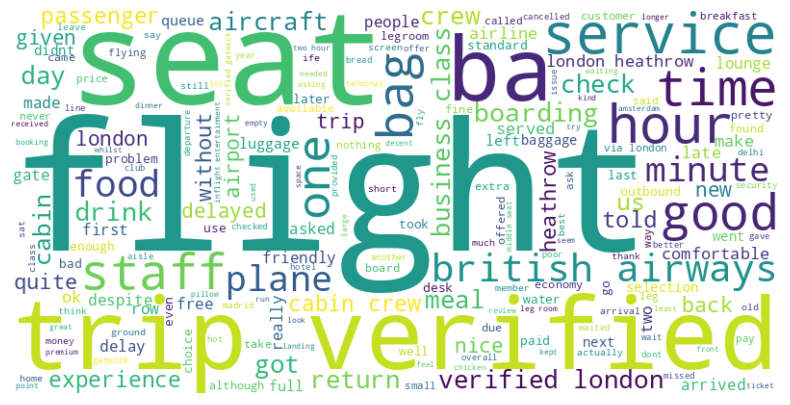

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into one string
text = ' '.join(df['Cleaned_Review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('data/wordcloud.png')
plt.show()


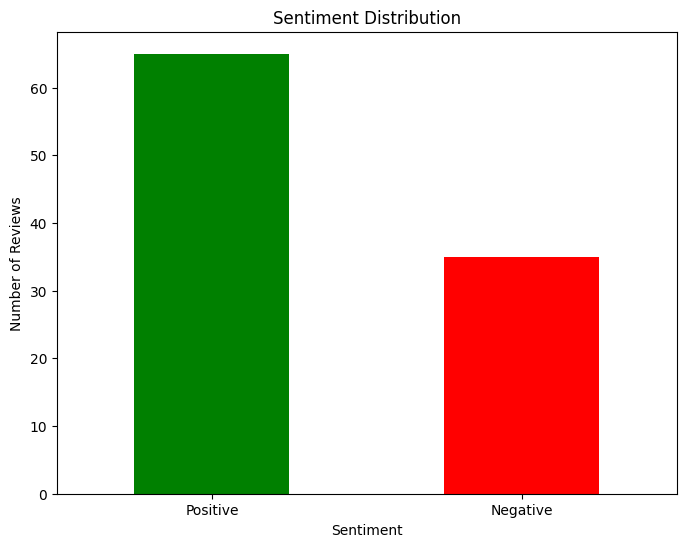

In [36]:
!pip install python-pptx
from pptx import Presentation
from pptx.util import Inches

# Create a presentation object
prs = Presentation()

# Add a title slide
slide = prs.slides.add_slide(prs.slide_layouts[0])
title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = "British Airways Customer Feedback Analysis"
subtitle.text = "Data Science Team"

# Add a slide for the sentiment analysis
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Sentiment Analysis"

# Add the sentiment distribution chart
sentiment_img_path = 'data/sentiment_distribution.png'
plt.figure(figsize=(8, 6))
df['Sentiment_Category'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
sentiment_counts = df['Sentiment_Category'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.savefig(sentiment_img_path)
plt.show()
slide.shapes.add_picture(sentiment_img_path, Inches(1), Inches(1.5), width=Inches(8))

# Add a slide for topic modeling
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Topic Modeling"

# Add topic modeling text
txBox = slide.shapes.add_textbox(Inches(1), Inches(1.5), Inches(8), Inches(3))
tf = txBox.text_frame
tf.text = "Main Topics Identified:\n"

for idx, topic in enumerate(topics):
    top_words = [feature_names[i] for i in topic.argsort()[-10:]]
    p = tf.add_paragraph()
    p.text = f"Topic #{idx + 1}: {', '.join(top_words)}"

# Add a slide for the word cloud
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Word Cloud"

# Add the word cloud image
wordcloud_img_path = 'data/wordcloud.png'
wordcloud.to_file(wordcloud_img_path)  # Save the word cloud image
slide.shapes.add_picture(wordcloud_img_path, Inches(1), Inches(1.5), width=Inches(8))

# Save the presentation
prs.save('data/BA_Customer_Feedback_Analysis.pptx')
